### Hind Ali    

In [1]:
import pandas as pd
df = pd.read_csv('gov-website-metrics-by-day.csv')
df

,Date,Unique visitors,Visits,Users,Actions,Maximum actions in one visit,Bounces,Total time spent by visitors (in seconds),Returning Visits,Actions by Returning Visits,...,Unique Downloads,Outlinks,Unique Outlinks,Searches,Unique Keywords,nb_hits_with_time_generation,Avg. generation time,Bounce Rate,Actions per Visit,Avg. Visit Duration (in seconds)
0,11/1/15,2432,2549,0,8166,330,1402,337314,591,2220,...,772,496,421,89,66,5372,1.08s,55%,3.2,0:02:12
1,11/2/15,4295,4559,0,16432,1145,2338,928955,1298,6802,...,1369,975,794,261,190,11224,0.93s,51%,3.6,0:03:24
2,11/3/15,5179,5506,0,19475,1212,2963,1071168,1511,7753,...,1262,1059,862,322,219,14406,1.1s,54%,3.5,0:03:15
3,11/4/15,4421,4700,0,18191,2863,2622,829080,1330,5216,...,2524,863,709,242,161,10435,0.93s,56%,3.9,0:02:56
4,11/5/15,3641,3852,0,13148,1224,2034,718296,1087,4564,...,1175,804,647,183,132,9509,1.26s,53%,3.4,0:03:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,10/28/17,2121,2270,0,6335,378,1272,480296,688,2055,...,1367,571,482,117,59,4058,0.97s,56%,2.8,0:03:32
728,10/29/17,3034,3232,0,7519,66,1810,624016,745,2015,...,825,678,582,118,73,5601,0.9s,56%,2.3,0:03:13
729,10/30/17,3833,4168,0,13176,596,1962,1162051,1438,5941,...,1195,1704,1274,254,175,9522,0.79s,47%,3.2,0:04:39
730,10/31/17,3496,3789,0,12002,583,1768,990223,1381,5139,...,942,1577,1219,216,146,8830,0.81s,47%,3.2,0:04:21


In [2]:
df.dtypes

Date                                            object
Unique visitors                                  int64
Visits                                           int64
Users                                            int64
Actions                                          int64
Maximum actions in one visit                     int64
Bounces                                          int64
Total time spent by visitors (in seconds)        int64
Returning Visits                                 int64
Actions by Returning Visits                      int64
Unique returning visitors                        int64
Returning Users                                  int64
Maximum actions in one returning visit           int64
Bounce Rate for Returning Visits                object
Avg. Actions per Returning Visit               float64
Avg. Duration of a Returning Visit (in sec)     object
Conversions                                      int64
Visits with Conversions                          int64
Revenue   

In [3]:
df1 = df[['Date','Unique visitors', 'Total time spent by visitors (in seconds)']]
# convert Date to datetime
df1['Date'] = pd.to_datetime(df1['Date'])


C:\Users\Hind Ali\AppData\Local\Temp\ipykernel_28460\3825060493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'])


In [4]:
# convert the column to a timedelta object
df1['Total time spent by visitors (in hour)'] = pd.to_timedelta(df1['Total time spent by visitors (in seconds)'], unit='s')



C:\Users\Hind Ali\AppData\Local\Temp\ipykernel_28460\153289489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Total time spent by visitors (in hour)'] = pd.to_timedelta(df1['Total time spent by visitors (in seconds)'], unit='s')


In [5]:
df1 = df1.drop('Total time spent by visitors (in seconds)', axis=1)

In [6]:
df1.head()

,Date,Unique visitors,Total time spent by visitors (in hour)
0,2015-11-01,2432,3 days 21:41:54
1,2015-11-02,4295,10 days 18:02:35
2,2015-11-03,5179,12 days 09:32:48
3,2015-11-04,4421,9 days 14:18:00
4,2015-11-05,3641,8 days 07:31:36


## 1. Track how their visits and engagement have picked up since we implemented my optimization strategy with them in October 2016 and with the second phase starting in March 2017? To measure engagement, look at the number of visitors and the amount of time the spent on the site.

In [7]:
df1 = df1[(df1['Date'] >= '2016-10-01') & (df1['Date'] <= '2017-03-31')]
df1.head()

,Date,Unique visitors,Total time spent by visitors (in hour)
335,2016-10-01,2937,3 days 23:27:57
336,2016-10-02,3691,4 days 23:28:59
337,2016-10-03,4523,10 days 11:27:37
338,2016-10-04,4632,10 days 00:13:41
339,2016-10-05,5445,12 days 01:28:33


In [8]:
df1 = df1.set_index('Date')

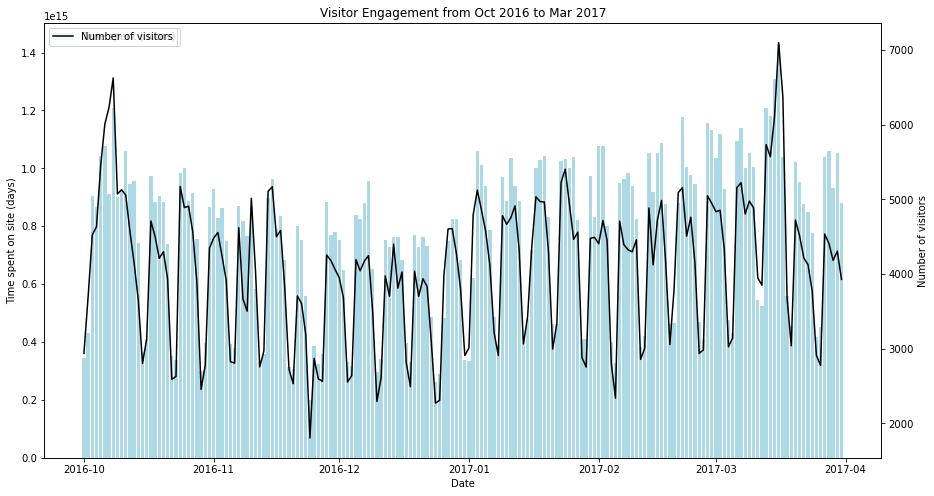

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
# Plot the number of visitors
ax.bar(df1.index,df1['Total time spent by visitors (in hour)'], color='lightblue', label='Time spent (hours)')
# Add a second y-axis for the time spent
ax2 = ax.twinx()
ax2.plot(df1.index, df1['Unique visitors'], label='Number of visitors', color='black')
# Set the axis labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Time spent on site (days)')
ax2.set_ylabel('Number of visitors')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
# Display the plot
plt.title('Visitor Engagement from Oct 2016 to Mar 2017')
plt.legend(loc='upper left')
plt.show()


### Explaination
The visual presents a mixed chart that combines a bar chart and a line graph to represent the daily trend of unique visitors and engagement on a website during the period from October 2016 to March 2017. The chart depicts a fluctuation in both daily unique visitors and total time spent on the site in hours, followed by significant increase, and later, fluctuation in both parameters until March 2017. However, after the implementation of the second phase of the optimization strategy, there was a significant surge in both daily unique visitors and total time spent on the site in hours. The report suggests that the mixed chart effectively visualizes the trend of daily unique visitors and engagement on the website. Furthermore, it recommends additional optimization efforts to maintain and enhance the site's traffic and engagement.


## What is driving downloads from the site? Are there any measures in this data set that seem to be correlated with downloads?


In [10]:
# Calculate the correlation between 'download' and other columns
corr_matrix = df.corr()
download_corr = corr_matrix['Downloads']
download_corr

Unique visitors                              0.511129
Visits                                       0.511626
Users                                             NaN
Actions                                      0.618424
Maximum actions in one visit                 0.726573
Bounces                                      0.419517
Total time spent by visitors (in seconds)    0.584705
Returning Visits                             0.537241
Actions by Returning Visits                  0.528318
Unique returning visitors                    0.543039
Returning Users                                   NaN
Maximum actions in one returning visit       0.423773
Avg. Actions per Returning Visit             0.295675
Conversions                                       NaN
Visits with Conversions                           NaN
Revenue                                           NaN
Pageviews                                    0.455095
Unique Pageviews                             0.501793
Downloads                   

### Explanation 
The given result represents the correlation between the 'Downloads' field and other fields in the dataset. The correlation coefficient ranges from -1 to +1, with a value of 0 indicating no correlation, a value of +1 indicating a perfect positive correlation, and a value of -1 indicating a perfect negative correlation.The correlation analysis indicates that the 'Downloads' field has a strong positive correlation with 'Unique Downloads - (0.968085)' and moderate positive correlations with fields such as 'Actions- (0.618424)', 'Total time spent by visitors', 'Unique returning visitors', 'Searches', 'Returning Visits', and 'Unique visitors'. However, fields such as 'Users', 'Returning Users', 'Conversions', 'Visits with Conversions', and 'Revenue' do not exhibit significant correlations with 'Downloads'. Therefore, focusing on fields such as 'Unique Downloads', 'Actions', 'Total time spent by visitors', 'Unique returning visitors', and 'Searches' may be useful in increasing the number of downloads.

## Look for patterns of when they are more likely to see more visitors. (The date data that is available).


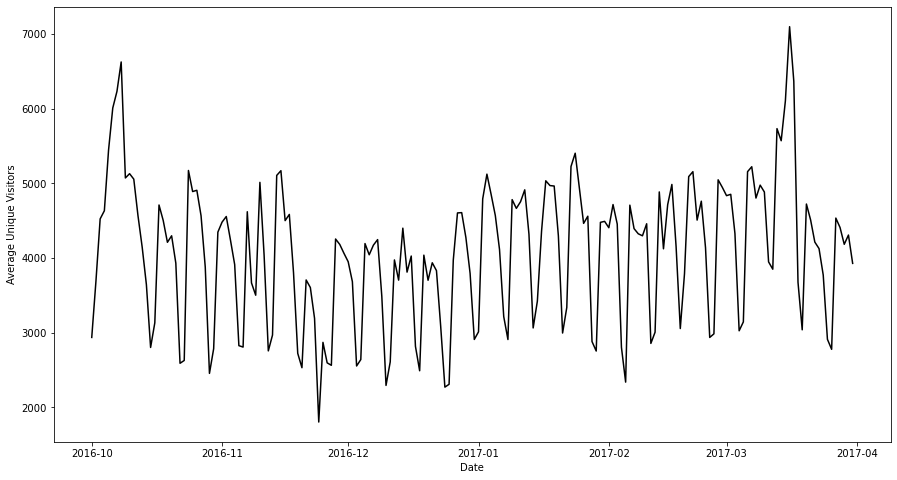

In [19]:
# create new column for month and year
df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Date'] >= '2016-10-01') & (df['Date'] <= '2017-03-31')]
# group data by month and year and calculate mean of unique visitors
grouped = df.groupby('Date')['Unique visitors'].mean()
# plot the data
plt.figure(figsize=(15,8))
plt.plot(grouped,color='black')
plt.xlabel('Date')
plt.ylabel('Average Unique Visitors')
plt.show()




### Explanation
The resulting plot shows a fluctuation in the average unique visitors between October 2015 and March 2017, with two significant increases. By examining the plot, we can identify periods where there are more visitors to the site, which could be useful for planning higher service levels.Initially, the average unique visitors decreased, and reached its minimum in December 2016, followed by an increase with fluctuations over time, peaking in March 2017. Subsequently, there was a decline in the number of visitors. 

